# Libraries and Data

In [51]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [22]:
df = pd.read_csv('AMZN_stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


# Time Series Index

In [24]:
# Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6987 entries, 1997-05-15 04:00:00+00:00 to 2025-02-21 05:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6987 non-null   float64
 1   High          6987 non-null   float64
 2   Low           6987 non-null   float64
 3   Close         6987 non-null   float64
 4   Volume        6987 non-null   int64  
 5   Dividends     6987 non-null   float64
 6   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.7 KB


In [26]:
start_date = df.index.min()
end_date = df.index.max()

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 1997-05-15 04:00:00+00:00
End Date: 2025-02-21 05:00:00+00:00


In [27]:
# Resampling to Weekly Frequency and calculate the mean values
df.resample('W').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-18 00:00:00+00:00,0.110157,0.111979,0.090886,0.092187,868560000.0,0.0,0.0
1997-05-25 00:00:00+00:00,0.079688,0.081354,0.072813,0.076667,232564800.0,0.0,0.0
1997-06-01 00:00:00+00:00,0.077213,0.079167,0.074349,0.076498,96696000.0,0.0,0.0
1997-06-08 00:00:00+00:00,0.074531,0.078021,0.072604,0.076042,73339200.0,0.0,0.0
1997-06-15 00:00:00+00:00,0.081667,0.082917,0.078542,0.080000,45297600.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-26 00:00:00+00:00,232.380001,234.785000,230.642498,233.997501,33423700.0,0.0,0.0
2025-02-02 00:00:00+00:00,234.632001,239.201999,232.923999,236.591998,37058060.0,0.0,0.0
2025-02-09 00:00:00+00:00,236.119998,238.912003,234.039996,236.725998,48832680.0,0.0,0.0


Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Exploring Data

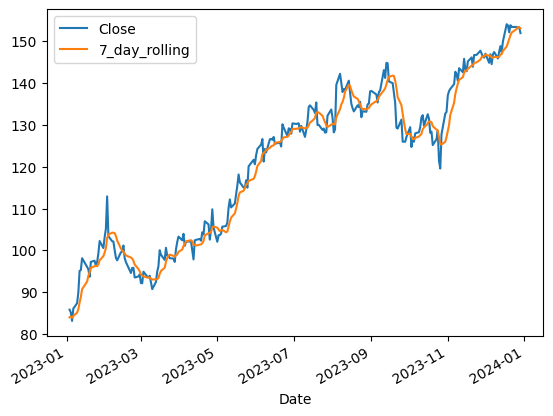

In [28]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the closing price
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [29]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest closing average
df.resample('M').mean()['Close'].idxmax()

<ipython-input-29-2603a7ade293>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()['Close'].idxmax()


Timestamp('2025-02-28 00:00:00+0000', tz='UTC')

In [30]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_rolling
Date,,,,,,,,
1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN
1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN
1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,NaN
1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,NaN
1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2025-02-14 05:00:00+00:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0,231.694281
2025-02-18 05:00:00+00:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0,229.954280
2025-02-19 05:00:00+00:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0,229.594282


In [31]:
df.resample('M').mean()

<ipython-input-31-f6f2e5924c1f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_rolling
Date,,,,,,,,
1997-05-31 00:00:00+00:00,0.084328,0.086127,0.076657,0.079427,2.987935e+08,0.0,0.0,0.077336
1997-06-30 00:00:00+00:00,0.077393,0.078919,0.075198,0.076885,5.063200e+07,0.0,0.0,0.076887
1997-07-31 00:00:00+00:00,0.108428,0.113352,0.105232,0.110275,9.874036e+07,0.0,0.0,0.104292
1997-08-31 00:00:00+00:00,0.111148,0.113715,0.107701,0.111570,3.038743e+07,0.0,0.0,0.112062
1997-09-30 00:00:00+00:00,0.171205,0.181746,0.164187,0.174628,1.027257e+08,0.0,0.0,0.161109
...,...,...,...,...,...,...,...,...
2024-10-31 00:00:00+00:00,187.005654,188.509133,185.186522,186.834783,3.190777e+07,0.0,0.0,186.892423
2024-11-30 00:00:00+00:00,203.901998,206.328500,201.721500,204.505000,4.529690e+07,0.0,0.0,202.134499
2024-12-31 00:00:00+00:00,223.817620,226.388094,221.667618,224.100952,3.623290e+07,0.0,0.0,221.531564


In [32]:
# # Series.pct_change() - calculate the percentage change from the previous row
# # Create a new column for closing daily return (percentage change in the price from one day to the next)
# df['daily_returns'] = df['Close'].pct_change() * 100

In [33]:
# # Days with more than 10% change in closing price
# df[abs(df['daily_returns']) > 10].head()

# Data Visualization

In [34]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_rolling
Date,,,,,,,,
1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN
1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN
1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,NaN
1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,NaN
1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,NaN


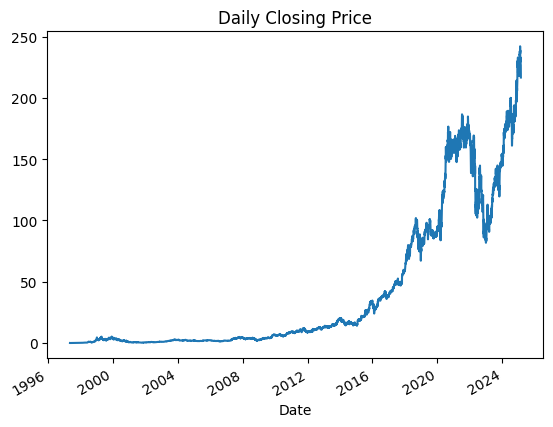

In [35]:
# Daily Closing Price Plot
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

<ipython-input-36-cf35bd71bdc0>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['Volume'].plot()


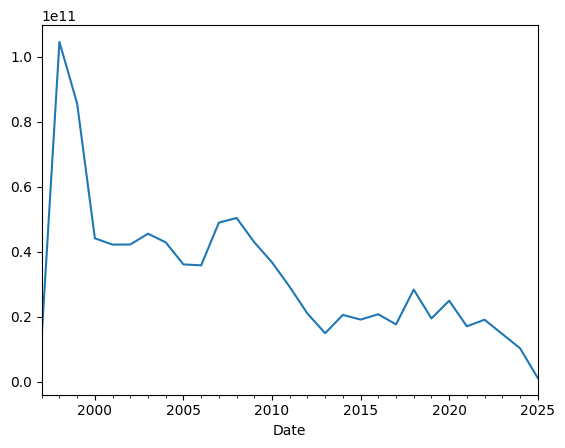

In [36]:
# Plot the Yearly Volume
df.resample('Y').sum()['Volume'].plot()
plt.show()

In [ ]:
# # Create a new column for 30- Day rolling average of the volume
# df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# # Plotting Closing Price and 30-day rolling Volume
# df['30_day_rolling_vol'].plot(legend = True)
# ax = df['Close'].plot(secondary_y = True, legend = True)
# ax.set_ylabel('Volume')
# plt.show()

In [ ]:
# # There's a high correlation between the 30-day rolling Volume and the Closing Price
# df[['Close', '30_day_rolling_vol']].corr()

# Data Manipulation

In [37]:
# Identify missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
7_day_rolling,6


In [38]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,
1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,1997,5,15,Thursday,3,False
1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN,1997,5,16,Friday,4,False
1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,NaN,1997,5,19,Monday,0,False
1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,NaN,1997,5,20,Tuesday,1,False
1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,NaN,1997,5,21,Wednesday,2,False


In [39]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)
df['closed_lag50'] = df['Close'].shift(50)

<Axes: xlabel='Date'>

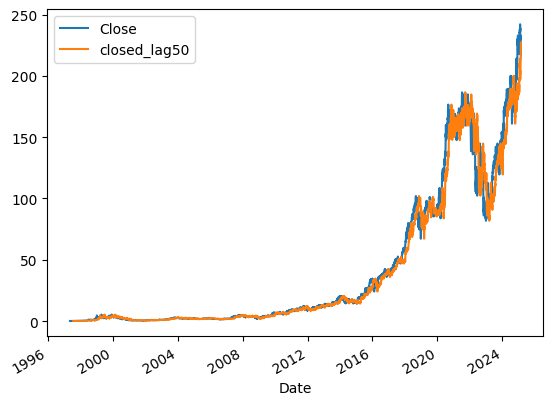

In [40]:
df[['Close', 'closed_lag50']].plot()

In [ ]:
# df[['Close', 'closed_lag1']].corr()

In [41]:
df.resample('M')['Close'].mean()

<ipython-input-41-7a11fc714f05>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Close'].mean()


,Close
Date,
1997-05-31 00:00:00+00:00,0.079427
1997-06-30 00:00:00+00:00,0.076885
1997-07-31 00:00:00+00:00,0.110275
1997-08-31 00:00:00+00:00,0.111570
1997-09-30 00:00:00+00:00,0.174628
...,...
2024-10-31 00:00:00+00:00,186.834783
2024-11-30 00:00:00+00:00,204.505000
2024-12-31 00:00:00+00:00,224.100952


# Seasonality

<ipython-input-42-681d3b7e5a1a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Close'].resample('M').mean(),


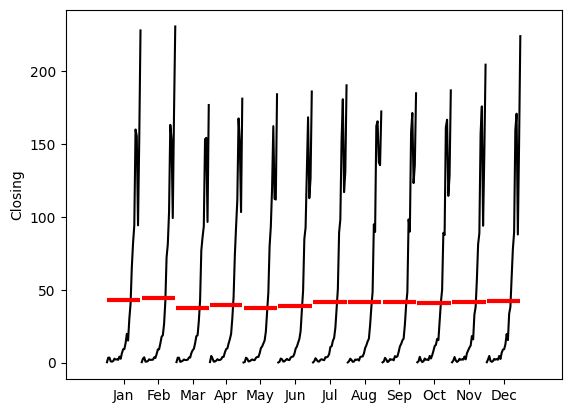

In [42]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of closing values
month_plot(df['Close'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()

<ipython-input-43-88ed811327ba>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(),


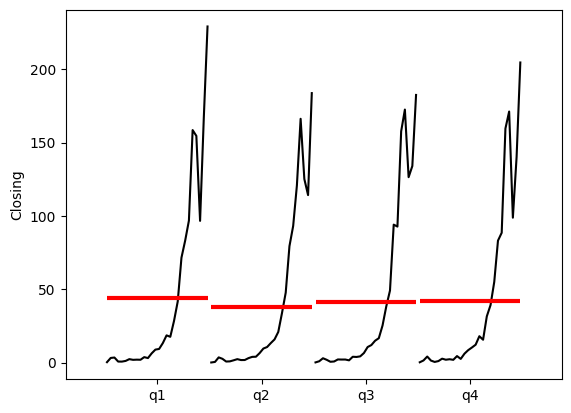

In [43]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

<ipython-input-44-88ed811327ba>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(),


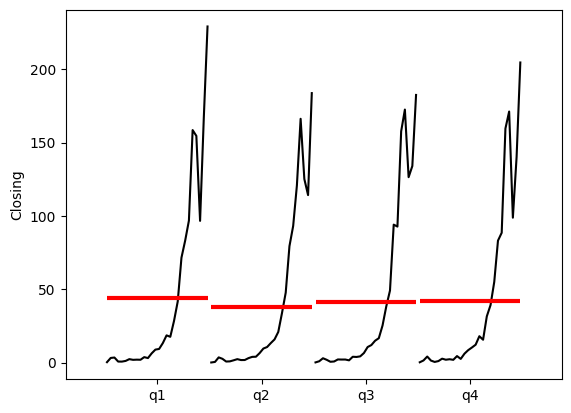

In [44]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

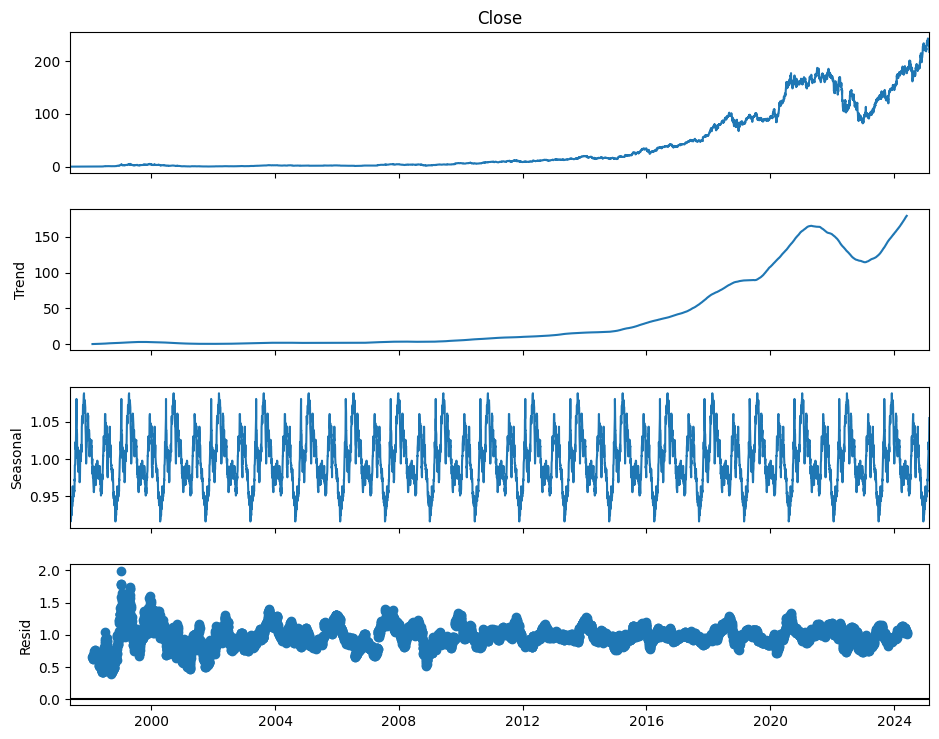

In [45]:
# Seasonal Decomposition Plots for Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Close'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




In [46]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend,closed_lag1,closed_lag2,closed_lag50
Date,,,,,,,,,,,,,,,,,
1997-05-15 04:00:00+00:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,1997,5,15,Thursday,3,False,NaN,NaN,NaN
1997-05-16 04:00:00+00:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN,1997,5,16,Friday,4,False,0.097917,NaN,NaN
1997-05-19 04:00:00+00:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,NaN,1997,5,19,Monday,0,False,0.086458,0.097917,NaN
1997-05-20 04:00:00+00:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,NaN,1997,5,20,Tuesday,1,False,0.085417,0.086458,NaN
1997-05-21 04:00:00+00:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,NaN,1997,5,21,Wednesday,2,False,0.081771,0.085417,NaN


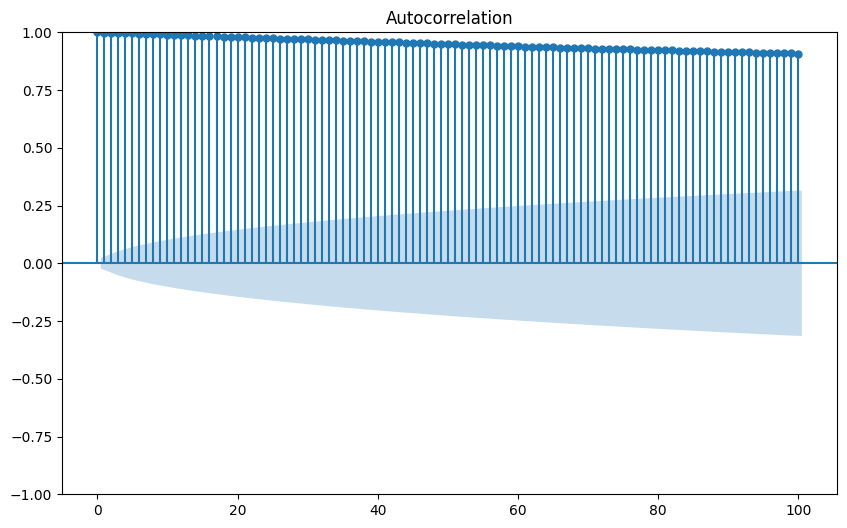

In [47]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Close'], lags = 100, ax = ax)
plt.show()

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

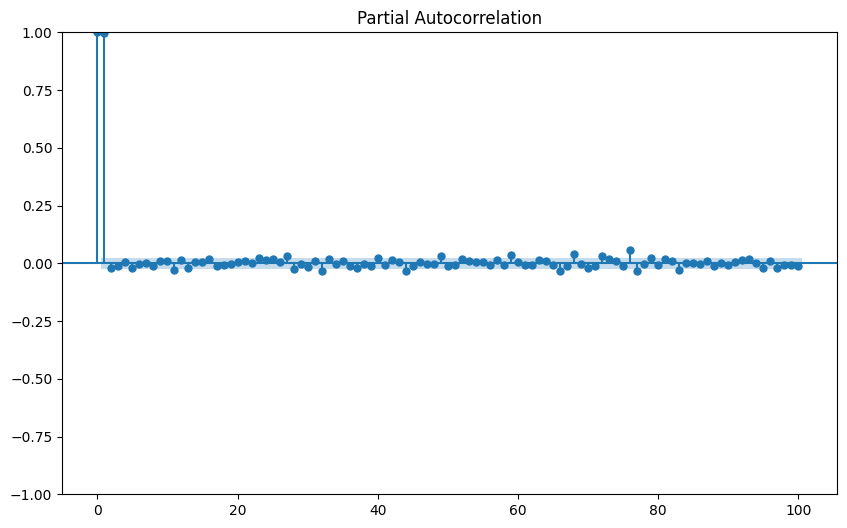

In [48]:
# Plot the partial autocorrelation (PACF) of the closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Close'], lags = 100, ax = ax)
plt.show()

In [50]:
# Define the number of days to be used for the test set
periods = 30
# Split the data into training and test sets, taking the 4th column ('Close')
train, test = df.iloc[:-periods,3], df.iloc[-periods:, 3 ]
test.head()

,Close
Date,
2025-01-08 05:00:00+00:00,222.130005
2025-01-10 05:00:00+00:00,218.940002
2025-01-13 05:00:00+00:00,218.460007
2025-01-14 05:00:00+00:00,217.759995
2025-01-15 05:00:00+00:00,223.350006


In [54]:
# Create a Simple Exponential Smoothing model using the training data.
model_simple = SimpleExpSmoothing(train).fit()

# Use the fitted model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_simple = model_simple.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


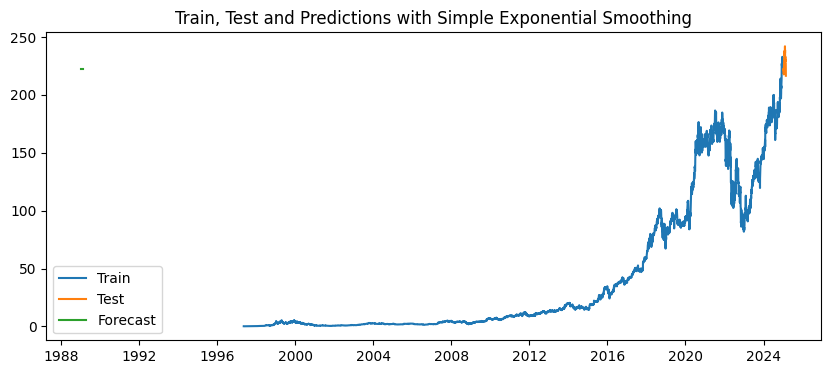

In [55]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot the train, test, and forecast data
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_simple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Simple Exponential Smoothing")
plt.legend()
plt.show()

In [56]:
# Double Exponential Smoothing Model
# Initialize and fit an Exponential Smoothing model to the training data
# Use a multiplicative trend component ('mul') and no seasonal component (seasonal=None)

#El model el mafroud yb2a esmo Holt Winters bas el library msamyaah exponential smoothing

model_double = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = None).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [57]:
# Use the fitted Double Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_double = model_double.forecast(len(test))
predictions_double

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
6957,222.438324
6958,222.664990
6959,222.891887
6960,223.119015
6961,223.346375
6962,223.573966
6963,223.801789
6964,224.029845
6965,224.258133
6966,224.486653


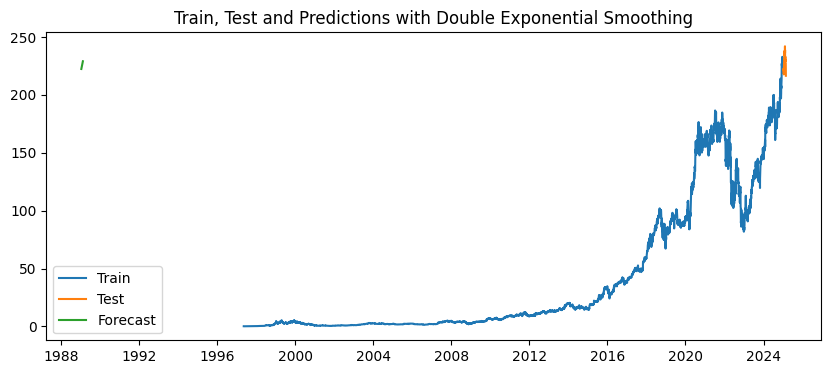

In [58]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_double, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

In [52]:
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the training data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 7 (daily data with weekly seasonality)

model_triple = ExponentialSmoothing(train,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 30).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [53]:
# Use the fitted Triple Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set. (30 days)
predictions_triple = model_triple.forecast(len(test))
predictions_triple

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
6957,222.627390
6958,223.494407
6959,224.041737
6960,223.900920
6961,223.707983
6962,223.617786
6963,224.114815
6964,224.702104
6965,225.147923
6966,226.101854


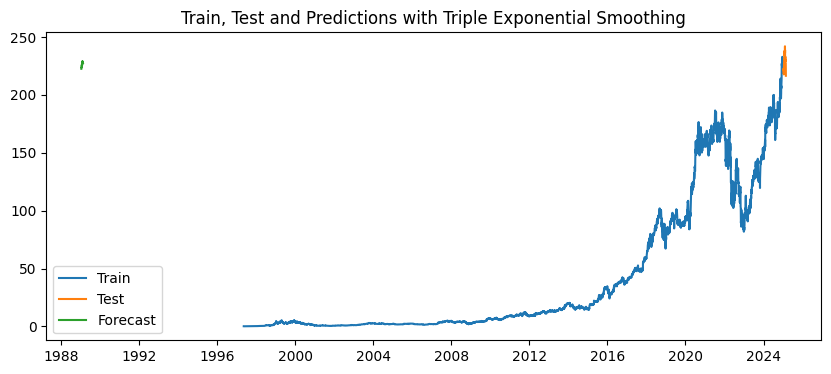

In [59]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_triple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [60]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test, predictions_triple)
rmse = sqrt(mean_squared_error(test, predictions_triple))
mape = mean_absolute_percentage_error(test, predictions_triple)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 6.05
The RMSE is 7.34
The MAPE is 2.60 %


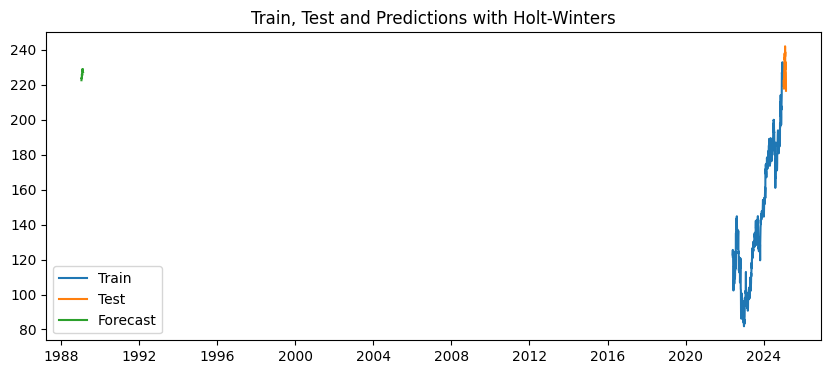

The MAE is 6.05
The RMSE is 7.34
The MAPE is 2.60 %


In [61]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = sqrt(mean_squared_error(test, predictions))
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Call the model_assessment function with the specified arguments
model_assessment(train['2022-06':], test, predictions_triple, "Holt-Winters")